<a href="https://colab.research.google.com/github/himanshunagapure/Loan-Status-Prediction/blob/main/Loan_Status_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [5]:
# for numerical operations
import numpy as np

# for dataframe operations
import pandas as pd

# data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning algorithms
import sklearn
import imblearn

In [6]:
#Uploading dataset downloaded from kaggle
#from google.colab import files
#uploaded = files.upload()

## Reading the Dataset

In [7]:
# lets import the dataset using the read_csv function
data = pd.read_csv('LoanData.csv')

# lets check the shape of the dataset
data.shape

(614, 13)

In [8]:
# lets check the column names present in the dataset
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
# lets check the head of the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **Lets look which all columns are necessary**
1. LoanID :- It doesn't really tell us anything.
2. Gender :- To get loan I don't think banks see gender of a person.
Married :- We will check for this
3. Dependents :- Important factor as it shows person's higher commitment
4. Education :- More educated more chances of loan repayment so more chances of getting loan
5. Self_Employed,	ApplicantIncome,	CoapplicantIncome,	LoanAmount	Loan_Amount_Term,	Credit_History and	Property_Area	are all important factors.

## Descriptive Statistics

In [10]:
# for numerical variables
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Take a close look at the average value and maximum value of the 'applicantincome' , 'co applicant income' and the 'loan amount' columns.
There is a huge difference b/w them.

So what should we do in case we see outliers in the data set? We will have to treat them

In [11]:
# for categorical variables
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


What can we see in this analysis?
One thing I can see is 'Loan Status' column . There are 2 unique values, top is Y and frequency of Y is 422 out of 614. So this is imbalanced target column.This can be treated by statistical resampling.

In [12]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Data Cleaning

In [13]:
# checking no. of Missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
data['Gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [44]:
data['Gender'].mode()

0    1
dtype: int64

In [14]:
# using mode values to impute categorical columns

data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

# using median values to impute the numerical columns

data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

# lets check if there is any null values left or not
data.isnull().sum()                           

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


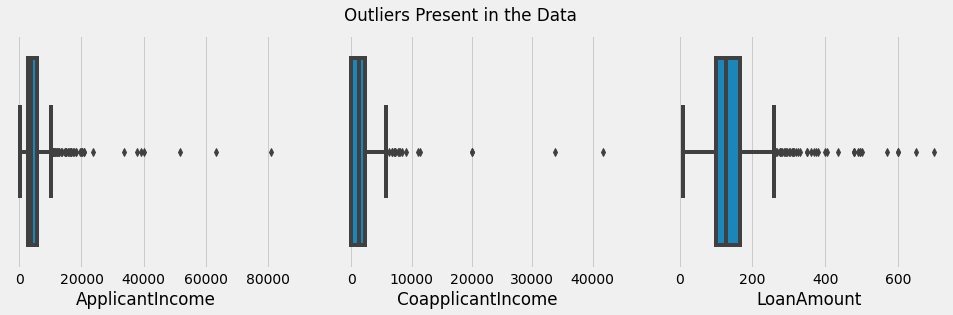

In [15]:
# lets visualize the outliers using Box Plot

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1, 3, 2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1, 3, 3)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers Present in the Data')
plt.show()

In [16]:
# lets remove the outliers from the data

#lets check the shape before removing outliers
print("Before Removing Outliers ", data.shape)

# lets filter the customers having more than 25000 income
data = data[data['ApplicantIncome'] < 25000]

#lets check the shape after removing outliers
print("After Removing Outliers ", data.shape)

Before Removing Outliers  (614, 13)
After Removing Outliers  (607, 13)


In [17]:
# lets remove the outliers from co-applicant's Income

#lets check the shape before removing outliers
print("Before Removing Outliers ", data.shape)

# lets filter the customers having more than 10000 coapplicant income
data = data[data['CoapplicantIncome'] < 10000]

#lets check the shape after removing outliers
print("After Removing Outliers ", data.shape)

Before Removing Outliers  (607, 13)
After Removing Outliers  (601, 13)


In [18]:
# lets remove the outliers from Loan Amount

#lets check the shape before removing outliers
print("Before Removing Outliers ", data.shape)

# lets filter the customers having more than 400 loan amount
data = data[data['LoanAmount'] < 400]

#lets check the shape after removing outliers
print("After Removing Outliers ", data.shape)

Before Removing Outliers  (601, 13)
After Removing Outliers  (590, 13)


## Univariate Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

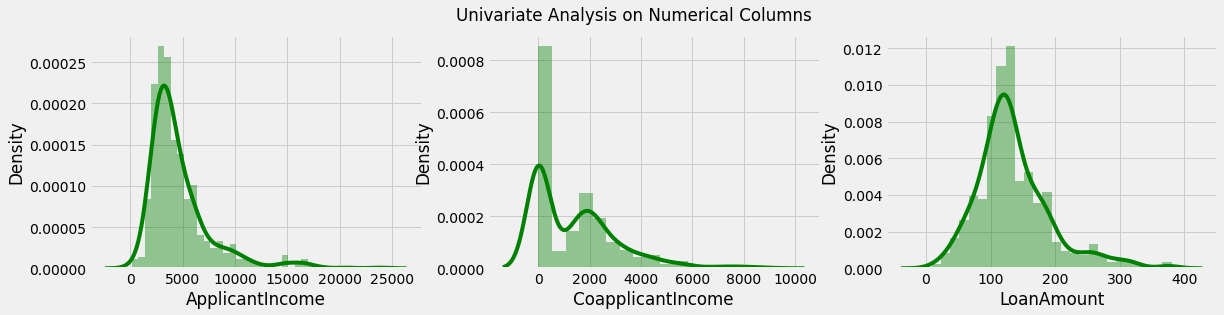

In [19]:
# Univariate Analysis on Numerical Columns

plt.rcParams['figure.figsize'] = (18, 4)
plt.subplot(1,3, 1)
sns.distplot(data['ApplicantIncome'], color = 'green')

plt.subplot(1,3, 2)
sns.distplot(data['CoapplicantIncome'], color = 'green')

plt.subplot(1,3, 3)
sns.distplot(data['LoanAmount'], color = 'green')

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

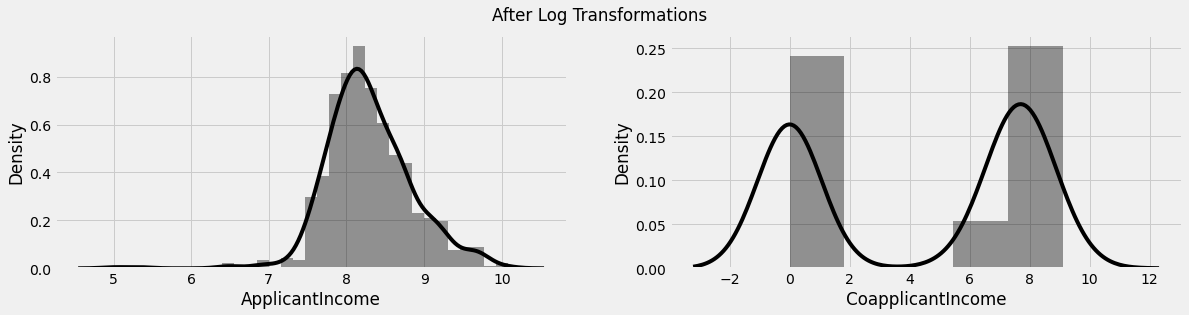

In [20]:
# lets remove skewness from ApplicantIncome and Coapplicant Income, as it can add bias to the data

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18, 4)

# lets apply log transformation to remove skewness
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

# lets plot them and check whether the skewness is removed or not
plt.subplot(1, 2, 1)
sns.distplot(data['ApplicantIncome'], color = 'black')

plt.subplot(1, 2, 2)
sns.distplot(data['CoapplicantIncome'], color = 'black')

plt.suptitle('After Log Transformations')
plt.show()

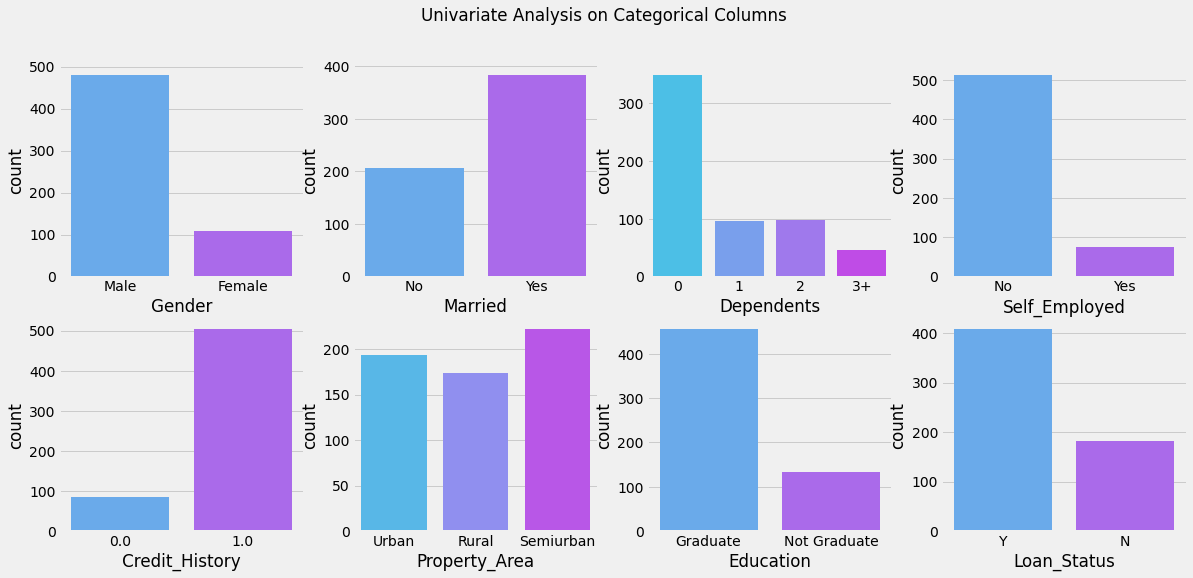

In [21]:
## Univariate Analysis on Categorical Columns

plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2, 4, 1)
sns.countplot(data['Gender'], palette = 'cool')

plt.subplot(2, 4, 2)
sns.countplot(data['Married'], palette = 'cool')

plt.subplot(2, 4, 3)
sns.countplot(data['Dependents'], palette = 'cool')

plt.subplot(2, 4, 4)
sns.countplot(data['Self_Employed'], palette = 'cool')

plt.subplot(2, 4, 5)
sns.countplot(data['Credit_History'], palette = 'cool')

plt.subplot(2, 4, 6)
sns.countplot(data['Property_Area'], palette = 'cool')

plt.subplot(2, 4, 7)
sns.countplot(data['Education'], palette = 'cool')

plt.subplot(2, 4, 8)
sns.countplot(data['Loan_Status'], palette = 'cool')

plt.suptitle('Univariate Analysis on Categorical Columns')
plt.show()

### Bivariate Data Analysis

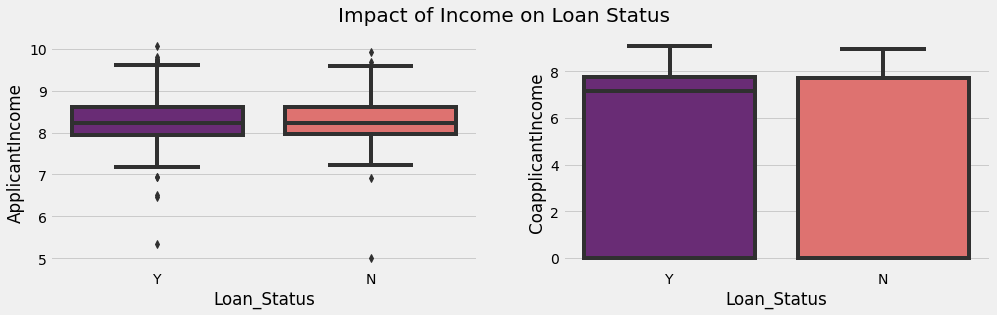

In [22]:
### Lets check the Impact of Income of Applicant and Co-applicant on Loan Status

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.boxplot(data['Loan_Status'], data['ApplicantIncome'], palette = 'magma')

plt.subplot(1, 2, 2)
sns.boxplot(data['Loan_Status'], data['CoapplicantIncome'], palette = 'magma')

plt.suptitle('Impact of Income on Loan Status\n', fontsize = 20)
plt.show()

No clear pattern above.

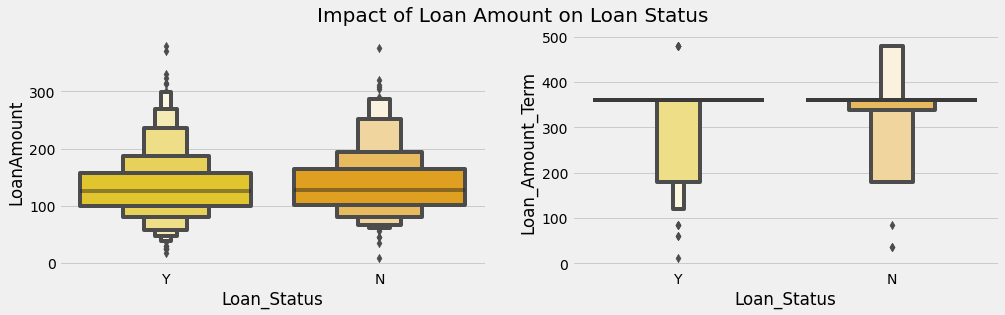

In [23]:
# lets check the Impact of Amount on Loan Status

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.boxenplot(data['Loan_Status'], data['LoanAmount'], palette = 'Wistia')

plt.subplot(1, 2, 2)
sns.boxenplot(data['Loan_Status'], data['Loan_Amount_Term'], palette = 'Wistia')

plt.suptitle('Impact of Loan Amount on Loan Status\n', fontsize = 20)
plt.show()

Not much info here also.

In [25]:
data['Dependents'].value_counts()

0     350
2      98
1      96
3+     46
Name: Dependents, dtype: int64

In [26]:
#Lets compare all categories with target Loan status columns

print("Impact of Marriage vs Loan status")
print(pd.crosstab(data['Loan_Status'], data['Married']))
print('\n')

print("Impact of Dependents vs Loan status")
print(pd.crosstab(data['Loan_Status'], data['Dependents']))
print('\n')

print("Impact of Education vs Loan status")
print(pd.crosstab(data['Loan_Status'], data['Education']))
print('\n')

print("Impact of Self_Employed vs Loan status")
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))
print('\n')

print("Impact of Property_Area vs Loan status")
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))
print('\n')

Impact of Marriage vs Loan status
Married       No  Yes
Loan_Status          
N             76  106
Y            130  278


Impact of Dependents vs Loan status
Dependents     0   1   2  3+
Loan_Status                 
N            110  33  24  15
Y            240  63  74  31


Impact of Education vs Loan status
Education    Graduate  Not Graduate
Loan_Status                        
N                 130            52
Y                 326            82


Impact of Self_Employed vs Loan status
Self_Employed   No  Yes
Loan_Status            
N              157   25
Y              357   51


Impact of Property_Area vs Loan status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         51     65
Y                108        171    129




1. The first column is married, you can see that unmarried candidates got their loan rejected seventy six times and approved 130 times.
Similarly, the married candidates got their loan, rejected one hundred and six times and approved two hundred and seventy eight times.
Although the difference between married and unmarried candidates to get a loan is very less. But still, married candidates have an upper edge over unmarried candidates.

2. We can see that in the dependent's column.
The impact of having one, two or three plus dependents is quite similar.
That means we can merge these three categories.

3. Similarly, in the property area column, we can see that semi urban and urban categories are very similar so we can merge them too.

## Data Preparation

In [27]:
# lets check the columns which are of object data types
data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [28]:
# lets delete the loan Id column from the data as this column has no relation with loan status

# lets check the shape of the data before deleting the columns
print("Before Deleting Columns :", data.shape)

data = data.drop(['Loan_ID'], axis = 1)

# lets check the shape of the data after deleting the columns
print("After Deleting Columns :", data.shape)

Before Deleting Columns : (590, 13)
After Deleting Columns : (590, 12)


In [47]:
# lets encode other columns

data['Gender'] = data['Gender'].replace(('Male','Female'),(1, 0))
data['Married'] = data['Married'].replace(('Yes','No'),(1, 0))
data['Education'] = data['Education'].replace(('Graduate','Not Graduate'), (1, 0))
data['Self_Employed'] = data['Self_Employed'].replace(('Yes','No'), (1, 0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y','N'), (1, 0))

# as seen above that Urban and Semi Urban Property have very similar Impact on Loan Status, so, we will merge them together
#data['Property_Area'] = data['Property_Area'].replace(('Urban','Semiurban', 'Rural'),(1, 1, 0))
data['Property_Area'] = data['Property_Area'].replace(('Urban','Semiurban', 'Rural'),(1, 2, 0)) #lets try this way

# as seen above that apart from 0 dependents, all are similar hence, we merge them to avoid any confusion
#data['Dependents'] = data['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 1, 1))
data['Dependents'] = data['Dependents'].replace(('0', '1', '2', '3+'), (2, 1, 1, 0)) #lets try this way

# lets check whether there is any object column left
data.select_dtypes('object').columns

Index([], dtype='object')

In [48]:
# lets split the Target column from the Data

y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis = 1)

# lets check the shape of x and y
print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (590, 11)
Shape of y : (590,)


### Resampling for Balancing the Data

In [49]:
# It is very important to resample the data, as the Target class is Highly imbalanced.
# Here We are going to use Over Sampling Technique to resample the data.
# lets import the SMOTE algorithm to do the same.

from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_resample(x, y.values.ravel())

# lets print the shape of x and y after resampling it
print(x_resample.shape)
print(y_resample.shape)

(816, 11)
(816,)


1. SMOTE (Synthetic Minority Oversampling Technique) synthesises new minority instances between existing minority instances. It randomly picks up the minority class and calculates the K-nearest neighbour for that particular point. Finally, the synthetic points are added between the neighbours and the chosen spot.
2. Random Under-Sampling: 
It aims to balance class distribution by randomly eliminating majority class examples.
3. Random Over-sampling: 
It aims to balance class distribution by randomly increasing minority class examples by replicating them.
4. Cluster-based Over Sampling: 
K means clustering algorithm is independently applied to both the class instances such as to identify clusters in the datasets. All clusters are oversampled such that clusters of the same class have the same size.

In [50]:
# lets also check the value counts of our target variable4

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
1    408
0    182
Name: Loan_Status, dtype: int64
After Resampling :
1    408
0    408
Name: 0, dtype: int64


In [51]:
# lets split the test data from the training data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# lets print the shapes again 
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", x_test.shape)
print("Shape of the y Test :", y_test.shape)

Shape of the x Train : (652, 11)
Shape of the y Train : (652, 1)
Shape of the x Test : (164, 11)
Shape of the y Test : (164, 1)


## Machine Learning Modelling

In [52]:
# lets apply Logistic Regression

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.7791411042944786
Testing Accuracy : 0.8170731707317073


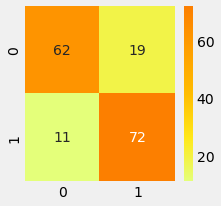

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        81
           1       0.79      0.87      0.83        83

    accuracy                           0.82       164
   macro avg       0.82      0.82      0.82       164
weighted avg       0.82      0.82      0.82       164



In [53]:
# lets analyze the Performance using Confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

# lets also use classification report for performance analysis
cr = classification_report(y_test, y_pred)
print(cr)

### Applying Gradient Boosting

In [54]:
# lets apply DecisionTrees

from sklearn.ensemble import GradientBoostingClassifier

model =  GradientBoostingClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.9095092024539877
Testing Accuracy : 0.8353658536585366


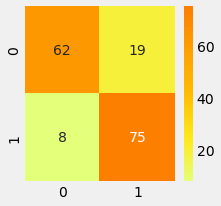

              precision    recall  f1-score   support

           0       0.89      0.77      0.82        81
           1       0.80      0.90      0.85        83

    accuracy                           0.84       164
   macro avg       0.84      0.83      0.83       164
weighted avg       0.84      0.84      0.83       164



In [55]:
# lets analyze the Performance using Confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

# lets also use classification report for performance analysis
cr = classification_report(y_test, y_pred)
print(cr)

In [56]:
from sklearn.model_selection import cross_val_score

clf = GradientBoostingClassifier(random_state = 0)
scores = cross_val_score(clf, x_train, y_train, cv=10)
print('Cross validation score(accuracy):',scores)

Cross validation score(accuracy): [0.65151515 0.8030303  0.75384615 0.87692308 0.8        0.81538462
 0.8        0.73846154 0.81538462 0.81538462]
